In [54]:
# First code chunk: Imports
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(2)

In [55]:
# Second code chunk: System Parameters
# System parameters
r = 0.2     # Maximum growth rate (arbitrary, can be calibrated with experimental data)
delta = 0.1  # Death rate (arbitrary, can be calibrated with experimental data)

# Drug 1 (Ciprofloxacin) parameters
k_f1 = 3.5e3    # Forward reaction rate (M^-1 * s^-1)
k_r1 = 3e-4     # Reverse reaction rate (s^-1)
theta1 = 100    # Number of targets per bacterium

# Drug 2 (Ampicillin) parameters
k_f2 = 495.7    # Forward reaction rate (M^-1 * s^-1)
k_r2 = 1e-4     # Reverse reaction rate (s^-1)
theta2 = 2500   # Number of targets per bacterium

# Initial conditions
B_0 = 1e6       # Initial bacterial population (arbitrary)
A1_0 = 0.5     # Initial drug 1 (Ciprofloxacin) concentration (M)
A2_0 = 0.5

In [ ]:
# Initial drug 2 (Ampicillin) concentration (M)

# Calculate initial conditions for targets based on B(0)*θᵢ
T1_0 = B_0 * theta1    # Initial free targets for drug 1
T2_0 = B_0 * theta2    # Initial free targets for drug 2
AT1_0 = 0             # Initial bound targets for drug 1 (zero initially)
AT2_0 = 0             # Initial bound targets for drug 2 (zero initially)

# Time points (in seconds)
t = np.linspace(0, 3600, 1000)  # Simulate for 2 hours

In [56]:
# Third code chunk: ODE System Definition
def system(y, t, r, delta, k_f1, k_r1, k_f2, k_r2):
    T1, T2, AT1, AT2, A1, A2, B = y
    
    # Bacterial growth rate (could be modified to depend on bound targets)
    dB_dt = r * B
    
    # System of ODEs
    dT1_dt = r * T1 + r * AT1 - delta * T1 - k_f1 * A1 * T1 + k_r1 * AT1
    dT2_dt = r * T2 + r * AT2 - delta * T2 - k_f2 * A2 * T2 + k_r2 * AT2
    dAT1_dt = -delta * AT1 + k_f1 * A1 * T1 - k_r1 * AT1
    dAT2_dt = -delta * AT2 + k_f2 * A2 * T2 - k_r2 * AT2
    dA1_dt = -k_f1 * A1 * T1 + k_r1 * AT1
    dA2_dt = -k_f2 * A2 * T2 + k_r2 * AT2
    
    return [dT1_dt, dT2_dt, dAT1_dt, dAT2_dt, dA1_dt, dA2_dt, dB_dt]

C:\Users\wxrde\AppData\Local\Temp\ipykernel_26084\3983928829.py:6: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  solution = odeint(system, y0, t, args=(r, delta, k_f1, k_r1, k_f2, k_r2))
C:\Users\wxrde\AppData\Local\Temp\ipykernel_26084\3983928829.py:29: RuntimeWarning: invalid value encountered in divide
  ax3.plot(t/60, solution[:, 0]/solution[:, 6], 'b-', label='τ₁(t) - Cipro targets')
C:\Users\wxrde\AppData\Local\Temp\ipykernel_26084\3983928829.py:30: RuntimeWarning: invalid value encountered in divide
  ax3.plot(t/60, solution[:, 1]/solution[:, 6], 'r--', label='τ₂(t) - Amp targets')
C:\Users\wxrde\AppData\Local\Temp\ipykernel_26084\3983928829.py:38: RuntimeWarning: invalid value encountered in divide
  ax4.plot(t/60, solution[:, 2]/solution[:, 6], 'b-', label='AT₁(t)/B(t) - Cipro')
C:\Users\wxrde\AppData\Local\Temp\ipykernel_26084\3983928829.py:39: RuntimeWarning: invalid value encoun

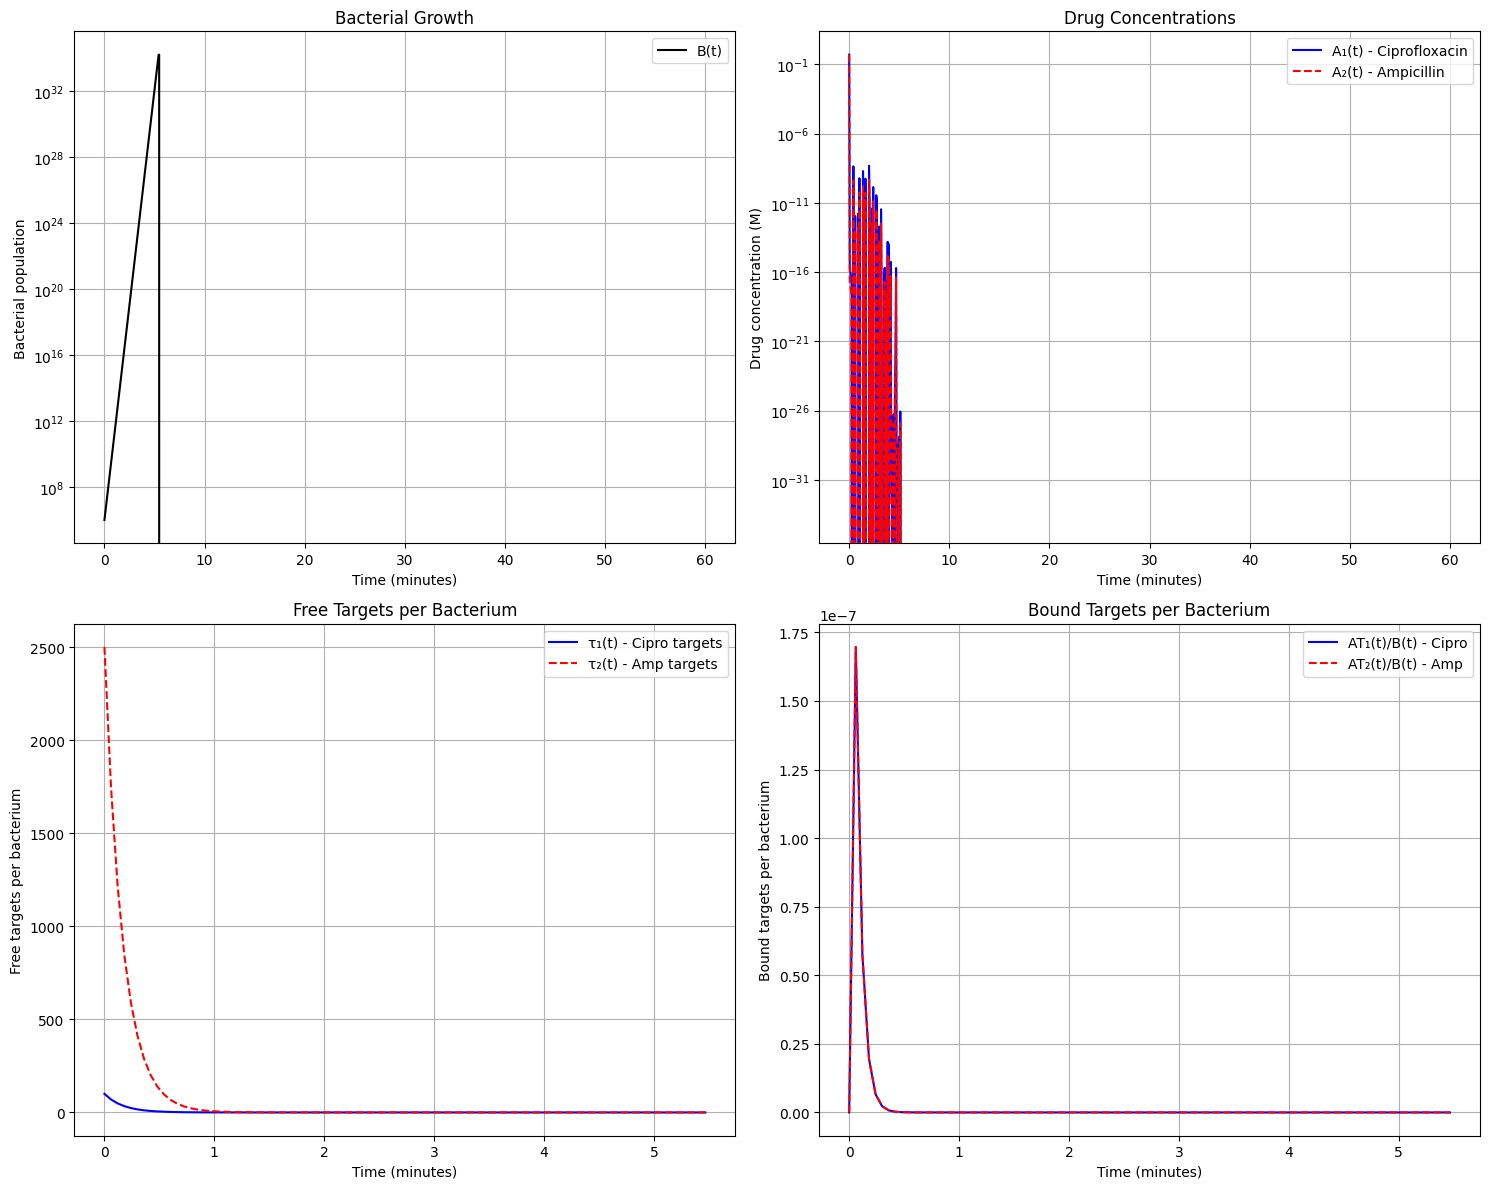

In [57]:
# Fourth code chunk: Solve and Plot
# Initial conditions vector
y0 = [T1_0, T2_0, AT1_0, AT2_0, A1_0, A2_0, B_0]

# Solve ODE system
solution = odeint(system, y0, t, args=(r, delta, k_f1, k_r1, k_f2, k_r2))

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot bacterial population
ax1.semilogy(t/60, solution[:, 6], 'k-', label='B(t)')
ax1.set_xlabel('Time (minutes)')
ax1.set_ylabel('Bacterial population')
ax1.set_title('Bacterial Growth')
ax1.legend()
ax1.grid(True)

# Plot drug concentrations
ax2.semilogy(t/60, solution[:, 4], 'b-', label='A₁(t) - Ciprofloxacin')
ax2.semilogy(t/60, solution[:, 5], 'r--', label='A₂(t) - Ampicillin')
ax2.set_xlabel('Time (minutes)')
ax2.set_ylabel('Drug concentration (M)')
ax2.set_title('Drug Concentrations')
ax2.legend()
ax2.grid(True)

# Plot free targets
ax3.plot(t/60, solution[:, 0]/solution[:, 6], 'b-', label='τ₁(t) - Cipro targets')
ax3.plot(t/60, solution[:, 1]/solution[:, 6], 'r--', label='τ₂(t) - Amp targets')
ax3.set_xlabel('Time (minutes)')
ax3.set_ylabel('Free targets per bacterium')
ax3.set_title('Free Targets per Bacterium')
ax3.legend()
ax3.grid(True)

# Plot bound targets
ax4.plot(t/60, solution[:, 2]/solution[:, 6], 'b-', label='AT₁(t)/B(t) - Cipro')
ax4.plot(t/60, solution[:, 3]/solution[:, 6], 'r--', label='AT₂(t)/B(t) - Amp')
ax4.set_xlabel('Time (minutes)')
ax4.set_ylabel('Bound targets per bacterium')
ax4.set_title('Bound Targets per Bacterium')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

In [58]:
# Fifth code chunk: Print Statistics
print(f"Final bacterial population: {solution[-1, 6]:.2e}")
print(f"Final drug concentrations:")
print(f"  Ciprofloxacin: {solution[-1, 4]:.2e} M")
print(f"  Ampicillin: {solution[-1, 5]:.2e} M")
print(f"\nFinal targets per bacterium:")
print(f"  Ciprofloxacin free: {solution[-1, 0]/solution[-1, 6]:.2f}")
print(f"  Ampicillin free: {solution[-1, 1]/solution[-1, 6]:.2f}")
print(f"  Ciprofloxacin bound: {solution[-1, 2]/solution[-1, 6]:.2f}")
print(f"  Ampicillin bound: {solution[-1, 3]/solution[-1, 6]:.2f}")

Final bacterial population: 0.00e+00
Final drug concentrations:
  Ciprofloxacin: 0.00e+00 M
  Ampicillin: 0.00e+00 M

Final targets per bacterium:
  Ciprofloxacin free: nan
  Ampicillin free: nan
  Ciprofloxacin bound: nan
  Ampicillin bound: nan


C:\Users\wxrde\AppData\Local\Temp\ipykernel_26084\3405176761.py:7: RuntimeWarning: invalid value encountered in scalar divide
  print(f"  Ciprofloxacin free: {solution[-1, 0]/solution[-1, 6]:.2f}")
C:\Users\wxrde\AppData\Local\Temp\ipykernel_26084\3405176761.py:8: RuntimeWarning: invalid value encountered in scalar divide
  print(f"  Ampicillin free: {solution[-1, 1]/solution[-1, 6]:.2f}")
C:\Users\wxrde\AppData\Local\Temp\ipykernel_26084\3405176761.py:9: RuntimeWarning: invalid value encountered in scalar divide
  print(f"  Ciprofloxacin bound: {solution[-1, 2]/solution[-1, 6]:.2f}")
C:\Users\wxrde\AppData\Local\Temp\ipykernel_26084\3405176761.py:10: RuntimeWarning: invalid value encountered in scalar divide
  print(f"  Ampicillin bound: {solution[-1, 3]/solution[-1, 6]:.2f}")
